In [1]:
# LOAD MODULES
from IPython.core.display import display, HTML # for max width
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from spacy.tokens import Doc, Span, Token
import scattertext as st
from IPython.display import IFrame
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import spatial
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
import spacy # software for analysing text
from spacy import displacy
nlp = spacy.load('en_core_web_md') # a medium english language model
import warnings
warnings.filterwarnings('ignore')

# LOAD FUNCTIONS
def compareMeanings(words):
    # calculate similarities
    pca = PCA(n_components=2)
    pca.fit([nlp(word).vector for word in words])
    word_vecs_2d = pca.transform([nlp(word).vector for word in words])
    
    # create plot 
    plt.figure(figsize=(5,5))
    plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])
    # for each word and coordinate pair: draw the text on the plot
    for word, coord in zip(words, word_vecs_2d):
        x, y = coord
        plt.text(x, y, word, size= 15)
    plt.savefig('fig.jpg', dpi=1000)
    # show the plot
    plt.show()
    
    
def mathsOnMeaning(start, subtract, add):
    x = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
    
    similar_words = []
    for word in nlp.vocab:
        if not (word.has_vector & word.is_lower):
            continue
        if not ((word.text!=start)&(word.text!=add)&(word.text!=subtract)):
            continue
     
        similarity = cosine_similarity(x, word.vector)
        similar_words.append((word, similarity))
        
    similar_words = sorted(similar_words, key=lambda item: -item[1])
    result = [w[0].text for w in similar_words[:5]][0]
    print(f"'{start}' minus '{subtract}' add '{add}' = {result}")
    
def scattertextTag(tag):
    def getX(doc):
        out = [x.text for x in doc if (x.tag_ in [tag])]
        return nlp(' '.join(out))
    df['text_x'] = df['text_doc'].apply(getX)
    
    corpus = st.CorpusFromParsedDocuments(df, 
                                          parsed_col='text_x',
                                category_col='post_type'
                                         ).build()
    html = st.produce_scattertext_explorer(corpus,
             category='story',
             category_name='Patient Criticism',
             not_category_name='Staff Responses',
             #characteristic_scorer=None,
             alternative_text_field='post_body',
             show_characteristic=False,                              
             width_in_pixels=800)
    return html

def scattertextThemes(topics):
    topic_feature_builder = st.FeatsFromTopicModel(topics)
    
    #CREATE CORPUS
    corpus = st.CorpusFromParsedDocuments(df, 
                                          parsed_col='text_doc',
                                          category_col='post_type',
                                          feats_from_spacy_doc=topic_feature_builder
                                          ).build()
    
    # CREATE PLOT
    html = st.produce_scattertext_explorer(corpus,
                                          category='story',
                                          category_name='Patient Criticism',
                                          not_category_name = 'Hospital Response',
                                          width_in_pixels=600,
                                           height_in_pixels=400,
                                          show_characteristic=False,
                                           use_non_text_features=True,
                                           show_top_terms=True,
                                          minimum_term_frequency=5,
                                          use_full_doc=True,
                                          p_value_colors=True,
                                          max_snippets = 11,
                                           pmi_threshold_coefficient=0,
                                        topic_model_term_lists=topic_feature_builder.get_top_model_term_lists()
                                          )
    return html

def findSentence(sentence_subject, sentence_objecet, sentence_contains):
    print('')
    if len(sentence_contains)>0:
        for doc in df.loc[df['post_type']=='response', 'text_doc']:
            for sent in doc.sents:
                for tok in sent:
                    if tok.text.lower() in sentence_contains:
                        for tok in sent:
                            if 'obj' in tok.dep_:
                                if tok.text.lower() in sentence_object:
                                    for tok in sent:
                                        if 'subj' in tok.dep_:
                                            if tok.text.lower() in sentence_subject:
                                                print(tok.sent)
                                                #displacy.render(tok.sent, jupyter=True, style='dep')
                                                break
    else:
        for doc in df.loc[df['post_type']=='response', 'text_doc']:
            for sent in doc.sents:
                for tok in sent:
                    if 'obj' in tok.dep_:
                        if tok.text.lower() in sentence_object:
                            for tok in sent:
                                if 'subj' in tok.dep_:
                                    if tok.text.lower() in sentence_subject:
                                        print(tok.sent)
                                        #displacy.render(tok.sent, jupyter=True, style='dep')
                                        break
print('Notebook loaded successfully')

# set up info
%load_ext watermark
%watermark -m -v -p pandas,numpy,scipy,statsmodels,matplotlib,seaborn,spacy,tqdm

# spacy model info
!python -m spacy info 
!python -m spacy info en_core_web_md

Notebook loaded successfully
CPython 3.7.6
IPython 7.12.0

pandas 0.25.1
numpy 1.17.2
scipy 1.4.1
statsmodels 0.11.1
matplotlib 3.1.3
seaborn 0.10.0
spacy 2.2.3
tqdm 4.43.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores  : 12
interpreter: 64bit

============================== Info about spaCy ==============================

spaCy version    2.2.3                         
Location         C:\Users\alexg\Anaconda3\envs\PyR_202003_pandas_0_25_3\lib\site-packages\spacy
Platform         Windows-10-10.0.18362-SP0     
Python version   3.7.6                         
Models                                         


===================== Info about model 'en_core_web_md' =====================

lang             en                            
name             core_web_md                   
license          MIT                           
author           Explosion          

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Jupyter-notebook" data-toc-modified-id="Jupyter-notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Jupyter notebook</a></span></li><li><span><a href="#Natural-Language-Processing-(NLP)" data-toc-modified-id="Natural-Language-Processing-(NLP)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Natural Language Processing (NLP)</a></span><ul class="toc-item"><li><span><a href="#Pre-2013:-Word-Frequency" data-toc-modified-id="Pre-2013:-Word-Frequency-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pre-2013: Word Frequency</a></span></li><li><span><a href="#Post-2013" data-toc-modified-id="Post-2013-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Post-2013</a></span></li></ul></li><li><span><a href="#Word-embeddings" data-toc-modified-id="Word-embeddings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Word embeddings</a></span><ul class="toc-item"><li><span><a href="#Find-words-used-in-similar-contexts" data-toc-modified-id="Find-words-used-in-similar-contexts-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Find words used in similar contexts</a></span></li><li><span><a href="#Comparing-word-meaning?" data-toc-modified-id="Comparing-word-meaning?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Comparing word meaning?</a></span></li><li><span><a href="#Comparing-sentence-meaning?" data-toc-modified-id="Comparing-sentence-meaning?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Comparing sentence meaning?</a></span></li><li><span><a href="#Scoring-sentences-against-target-meaning" data-toc-modified-id="Scoring-sentences-against-target-meaning-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Scoring sentences against target meaning</a></span></li><li><span><a href="#Adding-and-subtracting-meanings?" data-toc-modified-id="Adding-and-subtracting-meanings?-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Adding and subtracting meanings?</a></span></li><li><span><a href="#'Thought-vectors'" data-toc-modified-id="'Thought-vectors'-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>'Thought vectors'</a></span></li></ul></li><li><span><a href="#Hospital-Staff-Responding-to-Criticism" data-toc-modified-id="Hospital-Staff-Responding-to-Criticism-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hospital Staff Responding to Criticism</a></span><ul class="toc-item"><li><span><a href="#Research-context" data-toc-modified-id="Research-context-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Research context</a></span></li><li><span><a href="#Comparing-perspectives:-words" data-toc-modified-id="Comparing-perspectives:-words-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Comparing perspectives: words</a></span></li><li><span><a href="#Comparing-perspectives:-themes" data-toc-modified-id="Comparing-perspectives:-themes-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Comparing perspectives: themes</a></span></li><li><span><a href="#Which-responses-have-least-perspective-taking?" data-toc-modified-id="Which-responses-have-least-perspective-taking?-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Which responses have least perspective taking?</a></span></li><li><span><a href="#Which-responses-have-most-psychological-distancing?" data-toc-modified-id="Which-responses-have-most-psychological-distancing?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Which responses have most psychological distancing?</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

# Jupyter notebook

[Jupyter notebooks](https://jupyter.org/) (and more recently Jupyter Lab) are language agnostic notebooks. They can run many languages, especially: **Ju**lia, **Pyt**hon, and **R**. 

Initiated in 2014, Jupyter notebooks have rapidly become a [dominant platform for data analysis](https://www.nature.com/articles/d41586-018-07196-1). There is good reason to believe that they will eventually [replace the scientific article](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/) as we know it.

Scientific articles are texts that talk about data and analysis - but they don't allow readers to interact with the data or the analysis. Notebooks, are a step-change in scientific communication because they combine text, data, and analysis in one easy to read and reproducible package that is easy to share and interact with ([gallery of interesting notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)).

# Natural Language Processing (NLP)

NLP refers to using computers to search, manipulate and respond to human language

It is closely connected to AI, Machine Learning, Big Data

The driving motive is that Google, Facebook, etc. are investing vast resources in making computers understand text, image and sound in a way that matters for humans.

## Pre-2013: Word Frequency

To-date most psychological research using computers to analyse text has focused on word-frequency. Because the words we speak are closely connected to our thought patterns, this has produced several interesting results. For example:
- Identifying [authorship in Shakespeare's plays](http://elizabethan-theatre.org/wps/wp-content/uploads/2015/07/Double-Falsehood-by-Ryan-Boyd-Psychological-Science-2015.pdf)
- Longitudinal studies of Mayor [Giuliani's adaptation to the crisis of 9/11](https://www.sciencedirect.com/science/article/abs/pii/S0092656602923494)
- Detecting people's [personality from their writing style](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885844/?_escaped_fragment_=po=2.77778)
- Monitoring [public anxiety](https://www.tandfonline.com/doi/abs/10.1080/10410236.2011.571759) and public mood (which is [associated with stock prices](https://arxiv.org/pdf/1010.3003&))

But, all these studies use fairly basic word count techniques, or, slightly more advanced sentiment analysis.

## Post-2013 

Word vectors, or 'word embeddings', developed in the late 1990s by Yoshua Bengio, Geoffrey Hinton, et al. But, their significance was only appreciated in about 2013.

Before about 2013, most computational analysis of words focused on the textual appearance of a word; for example, 'dog' was similar to 'doggy' (same stem), similar to 'god' (same letters) and 'hog' (2 letters in the same order), but without any similarity to 'cat' (no similar letters). There seemed to be no way to make computers understand that 'dog' and 'cat' are both family pets and thus semantically related.

The breakthrough came from Wittgenstein's (1953; also Frith, 1957) insight: the meaning of words comes from the context in which they are used. Consider the sentence 'the X sat on the mat' - most people would agree that 'dog' and 'cat' are plausible candidates for X. That is to say, 'dog' and 'cat' occupy similar roles within similar sentences. 

Word embeddings encode the meaning of words not in terms of the words themselves, but, in terms of the context in which the words appear. By analyzing billions of webpages and books, statistical models are built based on which words occur in the same context. These models _seem_ to encode meaning.

# Word embeddings

Google and other companies are using word embeddings to [map the meaning of all words](https://projector.tensorflow.org/) - created by analysing the sentence context in which words are used accross _all_ books, webpages, news sources and other archives.

## Find words used in similar contexts

In [2]:
%run "C:\Dropbox\2_Research\_Python_functions\functions_spacy_v11.ipynb"

Try single words, such as: 'blue', 'summer', 'university' or 'psychology'. <br>
Also, try combinations of words: 'sad happy' (yields 'hope'), 

In [3]:
getTokensNearVector(nlp, 'happy angry')


TOKENS NEAR VECTOR:    irate surprised disgruntled discontented disatisfied unsatisfied dissatisfied dejected unhappy afraid everyone worried mad too disappointed annoyed exasperated irked miffed peeved wanting imagine wonder everybody everbody frustrated stymied so glad confused pissed scared shitless agitated anxious restless sad crazy forget wanted saddened shocked thought telling say even when was/is obviously expecting always surprise worry know seriously though remember nothing hope seeing convinced wondering but enough still sure tell tired hoping eyeing lucky want reminded just sorry let saying because why again feel really 



## Comparing word meaning?
Most people would agree that 'dog' is more similar to 'cat' than 'road' - and the models agree:

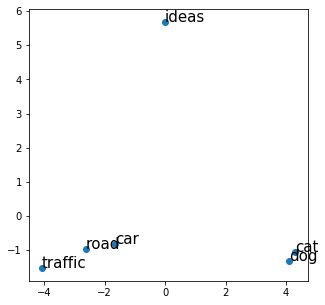

In [4]:
words = ['dog', 'cat', 'car', 'road', 'traffic', 'ideas']
    
compareMeanings(words)

## Comparing sentence meaning?

We can also use these models to compare sentences. Consider the following (all using unique words). Just by averaging the word embeddings for each sentence, we can see, that the model corresponds broadly to our human judgement. <br>
<br>
Change the sentences and re-run the cell to see the result.

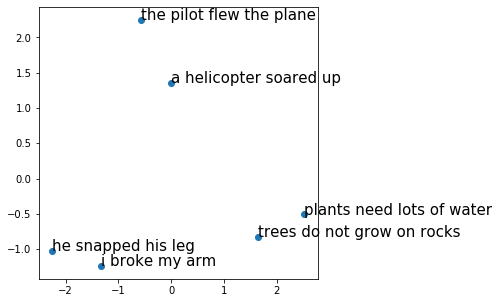

In [5]:
sentences = ['the pilot flew the plane', 
             'trees do not grow on rocks',
             'i broke my arm', 
             'he snapped his leg',
             'a helicopter soared up',
             'plants need lots of water']

compareMeanings(sentences)

## Scoring sentences against target meaning
The idea here comes from the [Garten et al. (2018)](https://link.springer.com/article/10.3758/s13428-017-0875-9) who argue that 

In [6]:
seed_terms = 'died'

sentences = ["Superb excellent ++",
             'accessible car park',
             'my arm broke', 
             'she was dying', 
             'he died later',
             'died died died']

for sent in sentences:
    score = round(nlp(sent).similarity(nlp(seed_terms)), 2)
    print("Similarity to 'died':  {:<4}  '{:}'".format(score, sent))

Similarity to 'died':  0.04  'Superb excellent ++'
Similarity to 'died':  0.2   'accessible car park'
Similarity to 'died':  0.4   'my arm broke'
Similarity to 'died':  0.68  'she was dying'
Similarity to 'died':  0.85  'he died later'
Similarity to 'died':  1.0   'died died died'


## Adding and subtracting meanings?
If words are represented as numbers, then, can we do mathematics with the meanings?

What if we start with the meaning of 'king' subtract 'man' and add 'woman' - what would the outcome be?

In [7]:
def mathsOnMeaning(start, subtract, add):
    x = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
    
    similar_words = []
    for word in nlp.vocab:
        if not (word.has_vector & word.is_lower):
            continue
        if not ((word.text!=start)&(word.text!=add)&(word.text!=subtract)):
            continue
     
        similarity = cosine_similarity(x, word.vector)
        #similarity = word.similarity(x)
        similar_words.append((word, similarity))
        
    similar_words = sorted(similar_words, key=lambda item: -item[1])
    result = [w[0].text for w in similar_words[:5]][0]
    print(f"'{start}' minus '{subtract}' add '{add}' = {result}")

In [8]:
%run "C:\Dropbox\2_Research\_Python_functions\functions_spacy_v11.ipynb"

Here are the words near 'died dead and dying'. 

In [9]:
v = nlp('died').vector
getTokensNearVector(nlp, v)


TOKENS NEAR VECTOR:    died death autopsy baptized christened born borned baptised lived emigrated immigrated resided summered killed survived perished dieing dying dead dies stepfather father burried interred entombed reinterred buried was alive reborn remembered recounted fondly recollected later came after gunned beheaded lynched murdered slain deceased obit testator intestate executor executrix decedents executors decedent now-deceased next-of-kin recently-deceased testate pre-deceased decease became had mother asphyxiated rain-swollen capsizes capsized drowns drowned succumbed suffered sufferred great-great-grandfather great-uncle great-great father-in-law great-grandfather great-great-great grandfather greatgrandfather great-great-great-great shortly widower widdow 77-year-old widow dowager lodger widows spinster widowhood 74-year-old h/o 81-year-old relict witn mactans daughter 4-year-old 2-year-old brother resurfaced disappeared vanished mysteriously receded disappearance reap

But, people tend to die in two ways: unintentional and intentional (murder). <br>
To find words associated with intentionall death, we subtract the concept of 'accident' and add the concept 'murder'.

In [10]:
v = nlp('died').vector - nlp('accident').vector + nlp('murder').vector
getTokensNearVector(nlp, v)


TOKENS NEAR VECTOR:    muder murder slaying gunned murdered beheaded lynched slain died death autopsy murdering dismembering beheading behead mudering decapitating hospitalizing massacring murders unsolved manslaughters murder/suicide poisoner cannibal murderess executioner triggerman blackmailer torturer unrepentant ringleader accomplice embezzler arsonist cop-killer cellmate murderer killed killing banished imprisons reprieved imprisoned guillotined imprisioned prisoned hanged baptized christened born borned baptised immigrated emigrated resided lived summered paroled exonerated acquitted indicted convicted felon co-conspirator co-accused absconding dead arraigned resentenced re-arrested absentia commuted extradited jailed embezzling sentenced rearrested sentanced stepfather father alive reborn dieing dying disappearances deportations burnings lynchings extra-judicial inter-communal execution-style jailings expulsions killings extrajudicial kidnappings executions abductions maulings

Or, we can look at the words associated with 'died' excluding the 'murder' and focusing on 'accidents'.

In [11]:
v = nlp('died').vector + nlp('accident').vector - nlp('murder').vector
getTokensNearVector(nlp, v)


TOKENS NEAR VECTOR:    died derailment mishap accident acident rollover crash collided unhurt malfunctioned crashed crash-landed nose-dived suffered succumbed sufferred fender-benders near-misses vehicle-related derailments fatigue-related slip-and-fall mishaps near-accidents motor-vehicle alcohol-related accidents accident-related uninjured injured injures injuried hospitalised non-life sports-related injuries injurys chain-reaction shipwreck wreckage wreck survived perished baptized baptised borned born christened collisions collison colliding collide fender-bender collision smash-up pile-up collides sideswipe colision head-on rear-end collission terrane was shortly non-fatal fatal single-vehicle nonfatal near-fatal single-car wrong-way after lived summered immigrated emigrated resided dieing dying dies medivac aeromedical extricated gurney paramedic pre-hospital stretcher ambulance paramedics medevac ambulence ambulances firetrucks fire-rescue ambulette firetruck dispatchers fire/r

In [12]:
v = nlp('rome').vector + nlp('uk england').vector 
getTokensNearVector(nlp, v)


TOKENS NEAR VECTOR:    pompei louvre pompeii navona civitavecchia fiumicino medici chieti michelangelo colosseum vinci rome latium cotswold england agrigento orvieto gimignano vicenza montalcino lucca trento montecatini perugia puglia sorrento riccione cortona romagna calabria amalfi liguria ravello montepulciano pescara positano sardinia ancona corsica italy viterbo taormina florence sicily lombardia chianti brindisi italia basilicata trapani siena umbria veneto abruzzo siracusa salerno ischia tuscany pisa aosta tesco ltd uk ukk europe europ contiki eurail hoxton paddington brighton brompton se1 ealing heathrow battersea shoreditch hammersmith kensington finsbury clerkenwell covent islington holborn piccadilly blackheath clapham brixton marylebone london euston donegal antrim tipperary kinsale leitrim ireland westmeath irland roscommon irelands ulster offaly fermanagh britian britan unitedkingdom inghilterra britain alsace tunisie lorient rouen montpellier italie maroc tourisme atlan

In [13]:
v = nlp('austria').vector
getTokensNearVector(nlp, v)


TOKENS NEAR VECTOR:    deutschland carinthia innsbruck rhine lech sixt styria austria klagenfurt tirol graz osterreich bregenz seefeld zell österreich livigno salzburg tyrol belgique hasselt kortrijk charleroi antwerpen belgie bruxelles leuven belgië brussels flanders antwerp belgium brabant luxemburg brugge mechelen ghent bruges belguim ostend chamonix lucerne ticino switzerland zurich neuchatel valais luxembourg schaffhausen ubs lausanne luzern interlaken alps meribel zürich zermatt winterthur gallen pilatus suisse engelberg wengen romande schweiz glarus zug fribourg geneva vaud swisscom grindelwald verbier svizzera oberland aargau berne snet netherlands leiden breda maastricht friesland arnhem groningen benelux hague oostende enschede nederland nijmegen eredivisie antilles netherland b.v. venlo willemstad limburg kahnawake dordrecht zwolle gelderland suomi umea finland liechtenstein eire tampere u.s.a. lapland oulu u.k. vaasa espana pukkelpop helsinki lahti eurovision finnair turku

In [14]:
start = 'he'
subtract = 'doctor'
add = 'woman'

start = 'doctor'
subtract = 'man'
add = 'woman'


v = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
#print(v)

from scipy.spatial import distance
import numpy as np

# Format the vocabulary for use in the distance function
ids = [x for x in nlp.vocab.vectors.keys()]
vectors1 = [nlp.vocab.vectors[x] for x in ids]
vectors2 = np.array(vectors1)
#print(vectors2)
        
# measure distances
dist = distance.cdist([np.array(v)],vectors2)[0]
    
# create df of results
df = pd.DataFrame({'distance':[x for x in dist]})
df.sort_values('distance', inplace=True)

# print output
words = []
for i in df.index[:50]:
    word_id = ids[i]
    output_word = nlp.vocab[word_id].text
    output_word = output_word.lower()
    if output_word not in words:
        words.append(output_word.lower())
        
words         
#remove input tokens

['doctor',
 'checkup',
 'gynecologist',
 'midwife',
 'med/surg',
 'prn',
 'anaesthesiologist',
 'nurse',
 'anesthetist',
 'r.n.',
 'radiologists',
 'physicians',
 'neurologists',
 'neurosurgeons',
 'gynecologists',
 'dermatologists',
 'ophthalmologists',
 'urologists',
 'oncologists',
 'cardiologists',
 'endocrinologists',
 'pediatricians',
 'obstetricians',
 'doctors']

In [15]:
getTokensNearVector(nlp, 'rome pizza')


TOKENS NEAR VECTOR:    pizzeria pizzaria navona michelangelo colosseum medici pompeii vinci pompei fiumicino chieti latium louvre civitavecchia italian tuscan neapolitan sicilian italien itallian ravello puglia riccione chianti corsica trento salerno florence ischia liguria montecatini pisa siracusa italia amalfi tuscany gimignano basilicata sicily lucca abruzzo umbria sardinia cortona siena brindisi aosta vicenza orvieto montalcino lombardia trapani romagna calabria perugia positano pescara veneto italy sorrento taormina ancona montepulciano viterbo agrigento donairs margherita take-away pizzerias wood-fired toppings pizze breadsticks thin-crusted appetisers family-sized sizzlers entrees flatbread pizzaiolo gelati pizza-making calzones stromboli pitas pizzas hoagies lasagnas deep-dish strombolis cheeseless mezze calzone woodfired antipasti meze flatbreads entrées paellas sanwich bagel sandwhich sammich sandwich sarnie panino sandwitch chicagoland chicago sun-times chicagos teashop te

In [16]:
from scipy import spatial
cosine_similarity = lambda x, y: 1-spatial.distance.cosine(x, y)
print("apple vs banana: ", cosine_similarity(nlp.vocab['apple'].vector, nlp.vocab['banana'].vector))

apple vs banana:  0.5831844210624695


In [17]:
start = 'king'
subtract = 'man'
add = 'woman'

mathsOnMeaning(start, subtract, add)

'king' minus 'man' add 'woman' = queen


- Try: 'uk' minus 'london' add 'geneva'
- Try: 'berlin' minus 'germany' add 'france'
- Try: 'india' minus 'curry' add 'pizza'
- Try: 'man' minus 'boy' add 'girl'
- Try: 'paris' minus 'france' add 'uk'

## 'Thought vectors'

Geoffrey Hinton, one of the developers of 'deep learning' techniques, talks about the above examples that focus on single words as only the first step: he (and Google) are working towards 'thought vectors'. 

While the above examples represent the meanings of words in a 300 dimensional mathematical space, they aim to map thoughts, ideas, sentences, and even whole articles and books into a multi-million dimensional space.

Transcritpts, texts, and even audio-visual data will become open ho high-level semantic analysis (meaning clusters, emotion, contradictions, meta-perspectives and dialogical tensions).

- Longitudinal analyses of an individual life-course
- Comparison of perspectives of groups in conflict
- Identifying the emergence of novelty and new ideas

And, all done, on any size of dataset, in real-time, and for almost zero cost.

# Hospital Staff Responding to Criticism 
Accidents in hospitals are a leading cause of death. At least 10% of people going into hospital come out with a new health problem. Causes include: delays, hospital infections, errors, wrong-site surgery, misdiagnosis, medication errors, not reading patient notes etc. 

While aviation, construction, and heavy industry have all become much safer over the last 50 years, healthcare has remained dangerous, and seems resistant to improvement. Some hospitals have a 'blame culture' with high defensiveness.

One idea is that medical staff could learn from patients: patients know their own bodies, are usually the only person who has been at all the meetings, and have increasing access to medical knowledge.

## Research context
Question: How do healthcare staff respond to critical feedback?
    
Data: Online discussions between patients and staff in the UK (about 250k paired dialogs)
    
- What is the divergence of perspective between patients and staff?

- How are staff listening to and/or ignoring the patient point of view?

In [18]:
# loading the data
df = pd.read_csv('co_crit3.csv')
df['text_doc'] = df['post_body'].apply(nlp)
df['post_type'].value_counts()

response    326
story       326
Name: post_type, dtype: int64

## Comparing perspectives: words
The plot below compares the text of 'patient stories' with 'staff responses' in terms of past-tense verbs.
- The vertical axis is for patients; horizontal axis is for staff
- Words in the top-right are common to both patients and staff (i.e., was, were, did, had)
- Words in the top-left are peculiar to patients (i.e., took, died, called, started, tried, refused)
- Words in the bottom-right are peculiar to staff (i.e., raised, expectations, experiences, mentioned, expressed)
- Clicking on a word 'died' shows the original text (85 patient posts, 1 staff post)


In [19]:
#html = scattertextTag('VBD')
file_name = 'co_crit3_past.html'
#open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1300, height=1000)

## Comparing perspectives: themes
Based on an examination of the patient and staff text, we can formulate two ideas.

1. Patients seem to be talking about 'real' clinical issues.

2. Staff seem reluctant to address these clinical issues, and prefer to talk about 'valuing feedback' and 'patient experience'

To test these ideas, we can make some 'topic themes' that we then map into the semantic space.

In [20]:
themes = {
    'clinical': ['clinical', 'unsafe', 'doctor', 'nurse', 'operation', 'diagnosis', 'misdiagnosis'],
    'pain': ['agony', 'suffering', 'pains', 'suffer', 'screaming'],
    'feedback': ['value', 'feedback', 'learning', 'listen', 'listening'],
    'experience': ['experience', 'concern', 'concerns', 'feelings']
}

html = scattertextThemes(themes)
file_name = 'co_crit3_themes.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1000, height=700)

## Which responses have least perspective taking?

Using the 'word embeddings' method, can we identify the staff response with the least perspective taking?

Method: compare the word vectors for the staff responses with the original patient story and find the biggest difference.


In [21]:
df_index = 1
df = df.sort_values(by='similarityToOrigin', ascending=True, axis='index').reset_index(drop=True)
selected_row = df.iloc[df_index, :,]
print(f"ORIGINAL POST\n{selected_row[['thread_originText']][0]}")
print(f"STAFF RESPONSE\n{selected_row[['post_body']][0]}")

ORIGINAL POST
I was admitted in November 09 for a total thyroidectomy after being diagnosed with cancer in October (had a hemithyroidectomy in September). The surgery went well, my consultant is a great guy. Ward 21: very busy. However, I hardly dared ask anything when after requesting some pain killers, I was told rather nastily: you're not the only one 'love'; you'll have to wait! And wait I did. For an hour! 
Discharged in the middle of November, whilst complaining of feeling nauseous and tingly but 'you'll be fine' I was told. Got home feeling worse; didn't sleep as I was tingling all over and rang the ward on the next day  at 7 am to ask for advice; I was told to come back straight away before I started 'cramping' and to bring my suitcase with me. My partner drove me back but I got into such a state - fingers paralysed, unable to talk that an ambulance picked me up and rushed me in. 
Hypocalcemia: no calcium left in my body. I was re-admitted for a couple of days and given loads o

The distressed cancer patient had her glads that produce calcilum damaged during surgery resulting in paralysis and provided conflicting information about a blood clot in her brain. 

Despite the clinical error, her main concern is the rudeness of staff who have ignored her feelings.

The staff response is generic: 'Thank you for your feedback'

## Which responses have most psychological distancing?
Psychological distancing (not distanciation) refers to defensive routines that hold problematic perspectives at a semantic distance, so as to neutralise their transformative potential. 

One type of psychological distancing is to refer to problematic perspectives as 'beliefs' or 'experiences'.

In [22]:
sentence_subject = ['you']
sentence_object = ['experience']
sentence_contains = ['impression', 'subjective']

findSentence(sentence_subject, sentence_object, sentence_contains)


We understand that following the experience you have had you would feel that we have been uncaring and unresponsive to your concerns and we are sorry for giving you this impression.


In the above excerpt has two types of psychological distancing:

First: The distressed patient is writing about a formal complaint they have submitted to the hospital, which has been ignored, and which they cannot get any feedback on (they have tried ringing and calling). Accordingly, the patient has resorted to a public post. Despite multiple failings by the hospital (known to the hospital) the problem is described in a psychologising manner:
- 'the experience'
- 'you would feel'
- 'your concerns'
- 'this impression'

Second: The staff (as a 'we') psychologises themselves, thus distancing from implications for action
- 'we understand'
- 'we are sorry'


# Conclusion

My substantive interest is to understand the ways that people don't listen. 
- distancing (psychologising problems)
- denial (ignoring topics)
- denigration (undermining the motive, stigma, expertise)
- rationalisation (individualising problems as one-off problem)

These strategies of not-listening guard the threshold between self and other; creating psychological comfort at the cost of transformative dialogue. 

If we want to understand how 'the social' leads to change, we need to understand 'semantic contact' - how alternative perspectives are accepted, rejected or modified.

But, for the purposes of our discussion, I also want to raise methodological questions:
- Is there a meeting between sociocultural psychology and NLP?
- What can NLP do for sociocultural psychology? - extra evidence, news tools, scale-up analyses?
- What can sociocultural psychology do for NLP? - conceptualizing the psychology of 'thought vectors', understanding the inherent dialogicality of language?
